This notebook tries to use Group_name, country and attack_type to predict target_type. Target type is split into 4 main categories: personal, political, utilities, others to increase the accuracy of the model. 

Model used is RandomForestClassifier. Accuracy on 4 main target categories: 62%, Accuracy on all 22 target types: 43%

In [217]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [198]:
df = pd.read_csv('terrorism_new.csv')
df = df.loc[:,['gname', 'country_txt', 'attacktype1_txt', 'targtype1']]
df = df.rename(columns={'gname' : 'group_name', 'country_txt' : 'country', 'attacktype1_txt' : 'attack_type', 'targtype1' : 'target_type'})
#remove all unknown
df['group_name'] = df.loc[df['group_name'] != 'Unknown']['group_name'].astype('category')
df['attack_type'] = df.loc[df['attack_type'] != 'Unknown']['attack_type'].astype('category')
df['target_type'] = df.loc[df['target_type'] != 20]['target_type'].astype('category')
df['country'] = df.loc[df['country'] != 'Unknown']['country'].astype('category')
df = df.dropna()
df

target_category = []

for index, row in df.iterrows():
    target = row['target_type']
    if target in [1,14,15,18]:
        category = 'personal'
    elif target in [2,3,4,7,9,12,22]:
        category = 'political'
    elif target in [5,13,17,20]:
        category = 'other'
    elif target in [6,8,10,11,16,19,21]:
        category = 'utilities'
    else:
        print(target)
    target_category.append(category)
    
df['target_category'] = target_category
df = df.drop('target_type', axis = 1)

/Users/xiaoqi.lim/Desktop/FYP/data-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,group_name,country,attack_type,target_type
0,MANO-D,Dominican Republic,Assassination,14
1,23rd of September Communist League,Mexico,Hostage Taking (Kidnapping),7
5,Black Nationalists,United States,Armed Assault,3
6,Tupamaros (Uruguay),Uruguay,Assassination,3
8,New Year's Gang,United States,Facility/Infrastructure Attack,4
...,...,...,...,...
191453,Mujahidin Indonesia Timur (MIT),Indonesia,Armed Assault,3
191457,Popular Front for the Renaissance of the Centr...,Central African Republic,Armed Assault,14
191459,Taliban,Afghanistan,Facility/Infrastructure Attack,3
191460,Taliban,Afghanistan,Facility/Infrastructure Attack,4


In [200]:
df

,group_name,country,attack_type,target_category
0,MANO-D,Dominican Republic,Assassination,personal
1,23rd of September Communist League,Mexico,Hostage Taking (Kidnapping),political
5,Black Nationalists,United States,Armed Assault,political
6,Tupamaros (Uruguay),Uruguay,Assassination,political
8,New Year's Gang,United States,Facility/Infrastructure Attack,political
...,...,...,...,...
191453,Mujahidin Indonesia Timur (MIT),Indonesia,Armed Assault,political
191457,Popular Front for the Renaissance of the Centr...,Central African Republic,Armed Assault,personal
191459,Taliban,Afghanistan,Facility/Infrastructure Attack,political
191460,Taliban,Afghanistan,Facility/Infrastructure Attack,political


In [201]:
# # target_mapping = {}

# # for target_num in df['target_type'].unique():
# #     name = df.loc[df['target_type'] == target_num]['targtype1_txt'].unique()
# #     target_mapping[target_num] = name[0]

# target_mapping: {14: 'Private Citizens & Property',
#  7: 'Government (Diplomatic)',
#  3: 'Police',
#  4: 'Military',
#  2: 'Government (General)',
#  1: 'Business',
#  8: 'Educational Institution',
#  22: 'Violent Political Party',
#  15: 'Religious Figures/Institutions',
#  20: 'Unknown',
#  19: 'Transportation',
#  21: 'Utilities',
#  6: 'Airports & Aircraft',
#  10: 'Journalists & Media',
#  16: 'Telecommunication',
#  9: 'Food or Water Supply',
#  12: 'NGO',
#  17: 'Terrorists/Non-State Militia',
#  13: 'Other',
#  18: 'Tourists',
#  11: 'Maritime',
#  5: 'Abortion Related'}

In [202]:
le = preprocessing.LabelEncoder()
le.fit(df['target_category'])
df['target_category'] = le.transform(df['target_category'])
df

,group_name,country,attack_type,target_category
0,MANO-D,Dominican Republic,Assassination,1
1,23rd of September Communist League,Mexico,Hostage Taking (Kidnapping),2
5,Black Nationalists,United States,Armed Assault,2
6,Tupamaros (Uruguay),Uruguay,Assassination,2
8,New Year's Gang,United States,Facility/Infrastructure Attack,2
...,...,...,...,...
191453,Mujahidin Indonesia Timur (MIT),Indonesia,Armed Assault,2
191457,Popular Front for the Renaissance of the Centr...,Central African Republic,Armed Assault,1
191459,Taliban,Afghanistan,Facility/Infrastructure Attack,2
191460,Taliban,Afghanistan,Facility/Infrastructure Attack,2


In [203]:
# Labels are the values we want to predict
labels = np.array(df['target_category'])
df = df.drop('target_category', axis = 1)
# df = df.loc[:,'target_type']
# print(df)
# Saving feature names for later use
# col_list = list(df.columns)
# one-hot encoding
df_encoded = pd.get_dummies(df)
df_encoded_np = np.array(df_encoded)
# Convert to numpy array
# df = np.array(df)

In [204]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, labels, test_size = 0.25, random_state = 42)


In [205]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (72363, 3829)
Training Labels Shape: (72363,)
Testing Features Shape: (24121, 3829)
Testing Labels Shape: (24121,)


In [213]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
forest_classifier = RandomForestClassifier(n_estimators = 100)
# Train the model on training data
forest_classifier.fit(X_train, y_train);

In [214]:
forest_classifier.score(X_test, y_test)

0.6203308320550558

In [215]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions for the test set
y_pred_test = forest_classifier.predict(X_test)
# View accuracy score
print('accuracy: {}'.format(accuracy_score(y_test, y_pred_test)))
# View confusion matrix for test data and predictions
display(confusion_matrix(y_test, y_pred_test))


accuracy: 0.6203308320550558


array([[  82,  130,  227,    3],
       [  21, 5205, 3372,  626],
       [  14, 2347, 8414,  514],
       [   3,  829, 1072, 1262]])

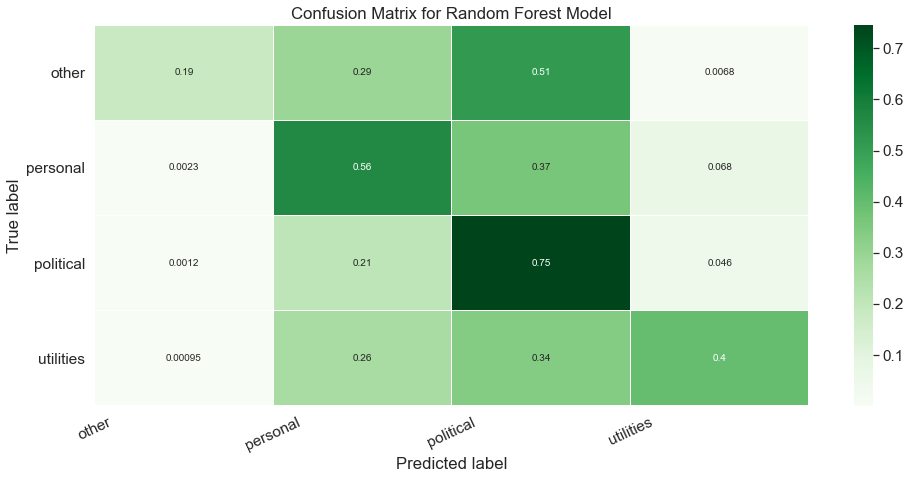

In [216]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot

class_names = le.classes_
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred_test))

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
forest_regressor = RandomForestRegressor(n_estimators = 100)
# Train the model on training data
forest_regressor.fit(train_features, train_labels);

In [ ]:
forest_regressor.score(test_features, test_labels)